In [1]:
import sys
sys.path.append('..')

In [2]:
from typing import List, Tuple
import random
import time

In [3]:
import matplotlib.pyplot as plt
import numpy as np

In [4]:
from src.data_access.detailed_dataset_generation import  DetailedDatasetHandler
from src.primitives.data_access import DataSetExampleBatch
from src.visualisation.plotting import make_column_plot

In [5]:
TO_SHOW_FROM_SPLIT = 4

In [6]:
def adjust_batch_to_show(batch: DataSetExampleBatch
                         ) -> List[Tuple[np.ndarray, np.ndarray]]:
    images, masks = batch
    return [
        (image, mask[:, :, 0])  for image, mask in zip(images, masks)
    ]

In [7]:
COLUMNS = ['image', 'ground truth']

In [12]:
clazz = "adapter"
difficulty = "easy"
data_handler = DetailedDatasetHandler(clazz, difficulty)
generator = data_handler.generate_folds_generator()
transformation_chain = data_handler.generate_transformation_chain()

Batch transformation for 4 el. took 0.23256516456604004s
Batch transformation for 4 el. took 0.2888987064361572s
Batch transformation for 4 el. took 0.3958566188812256s
Batch transformation for 4 el. took 0.3478832244873047s


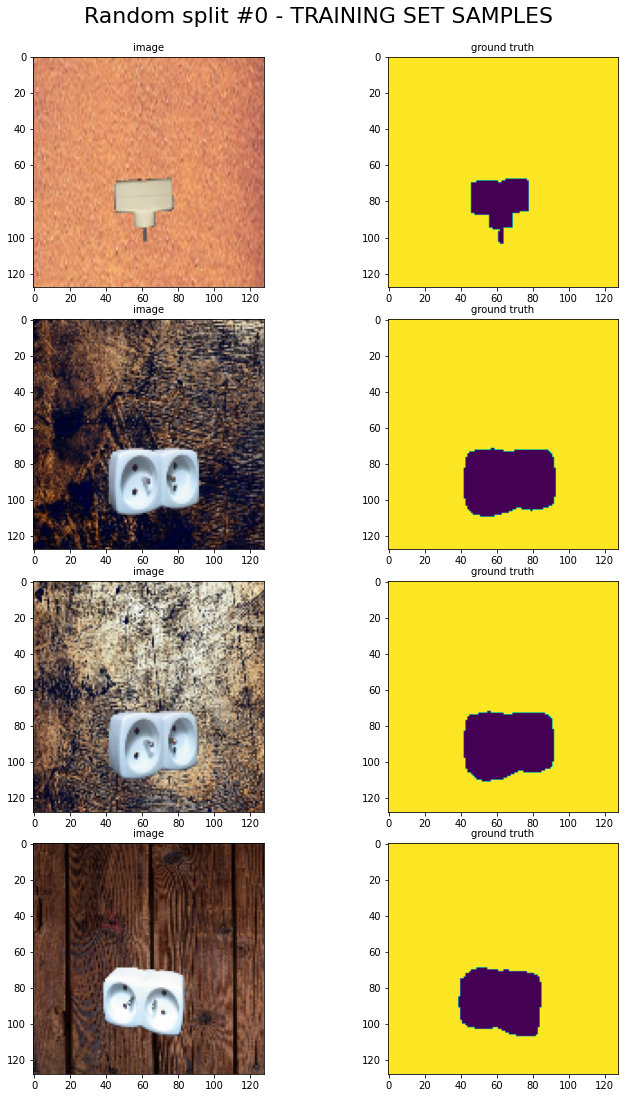

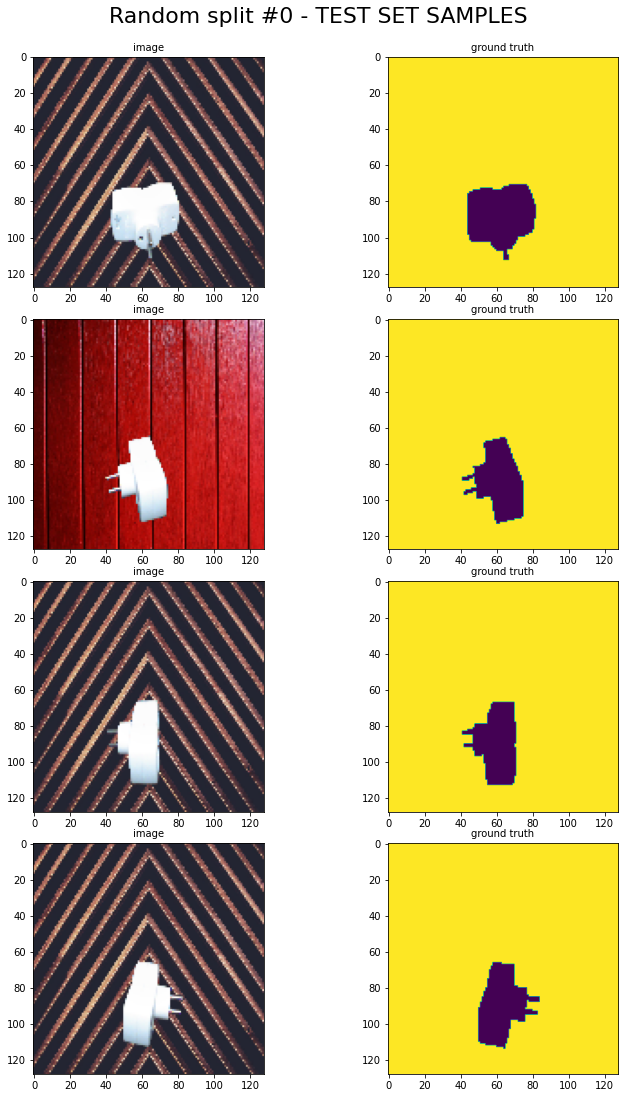

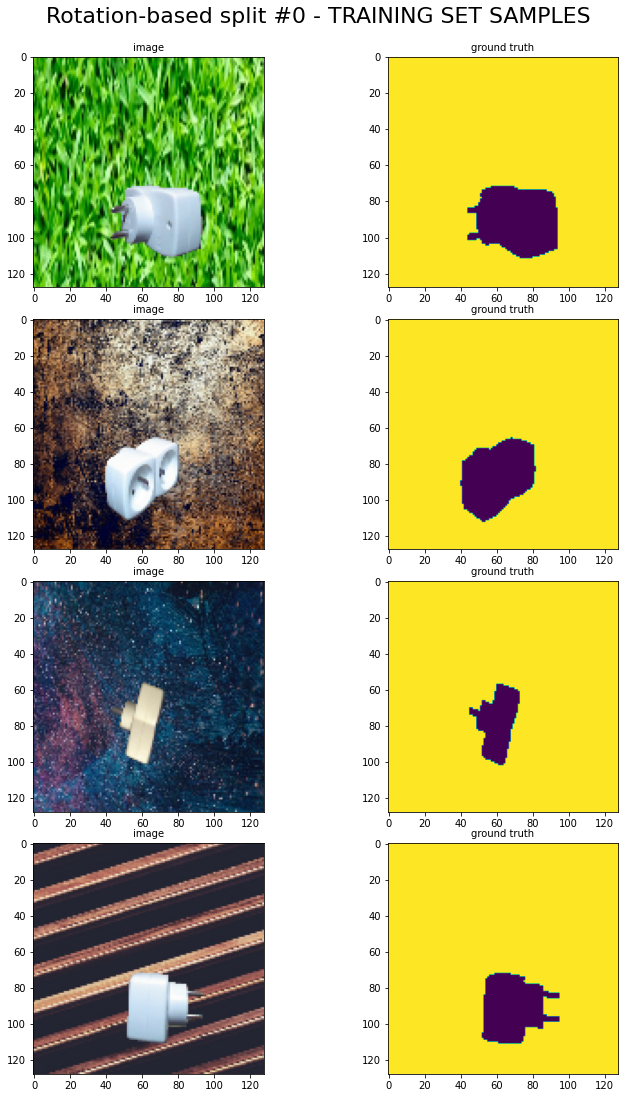

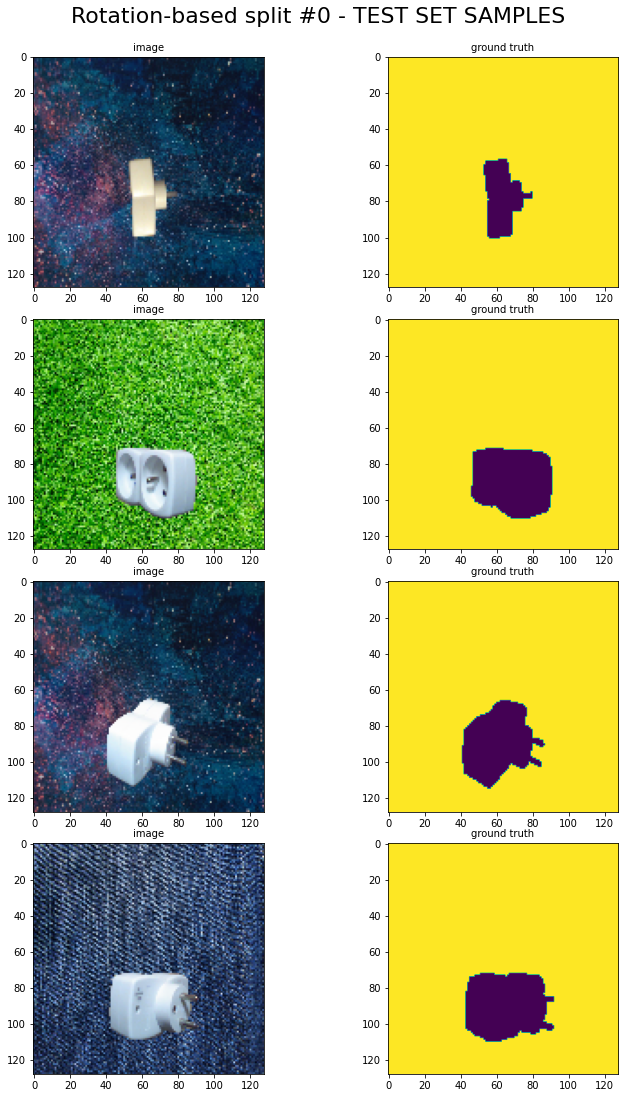

In [13]:
for split in generator.generate_folds():
    training_set_examples = split.training_set.examples
    random.shuffle(training_set_examples)
    start_time = time.time()
    training_set_examples = transformation_chain.transform_batch(
        training_set_examples[:TO_SHOW_FROM_SPLIT]
    )
    duration = time.time() - start_time
    print(f"Batch transformation for {TO_SHOW_FROM_SPLIT} el. took {duration}s")
    training_set_examples = adjust_batch_to_show(
        batch=training_set_examples
    )
    make_column_plot(
        title=f'{split.name} - TRAINING SET SAMPLES',
        column_names=COLUMNS,
        content=training_set_examples
    )
    plt.show()
    test_set_examples = split.test_set.examples
    random.shuffle(test_set_examples)
    start_time = time.time()
    test_set_examples = transformation_chain.transform_batch(
        test_set_examples[:TO_SHOW_FROM_SPLIT]
    )
    duration = time.time() - start_time
    print(f"Batch transformation for {TO_SHOW_FROM_SPLIT} el. took {duration}s")
    test_set_examples = adjust_batch_to_show(
        batch=test_set_examples
    )
    make_column_plot(
        title=f'{split.name} - TEST SET SAMPLES',
        column_names=COLUMNS,
        content=test_set_examples
    )
    plt.show()